In [1]:
%matplotlib inline

In [2]:
import mne
import os
import numpy as np


In [3]:
#Getting the data
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_filt-0-40_raw.fif')

In [4]:
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)

Opening raw data file C:\Users\louis\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


In [5]:
raw.pick_types(meg=False, eeg=True, stim=True)

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


<Raw | sample_audvis_filt-0-40_raw.fif, 68 x 41700 (277.7 s), ~24.6 MB, data loaded>

In [ ]:
# filter your data
#When loaded data is filtered at 0.1 and 40 hZ

In [6]:
# highpass: 0.1 | 0.5 Hz
# lowpass: 40Hz

#The filters are reversed - l_freq = highpass, and h_freq = lowpass
#trying to put a high frequency for lowpass filter (h_freq)

#High pass filter first, then low pass filter (instead of both at the same time, which can produce more artifacts)
raw_filtered = raw.copy().filter(l_freq=0.1, h_freq=75)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 0.08 Hz (-6 dB cutoff frequency: 75.04 Hz)
- Filter length: 6447 samples (42.936 sec)



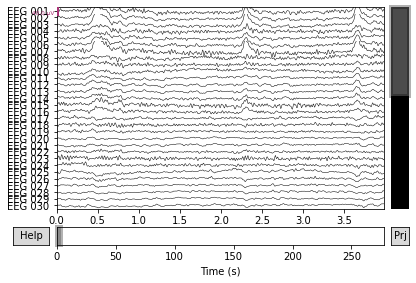

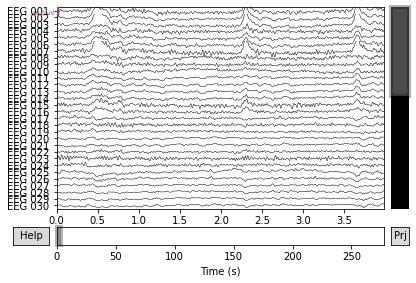

In [7]:
#Plotting
raw.plot(duration=4, n_channels=30); # normal filtering (standard)
raw_filtered.plot(duration=4, n_channels=30); #with high lowpass frequency

Fitting ICA to data using 59 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.5s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


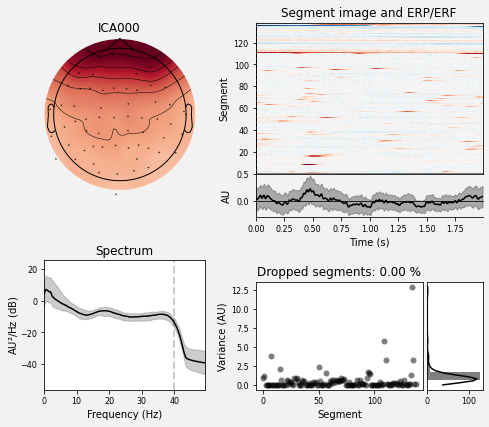

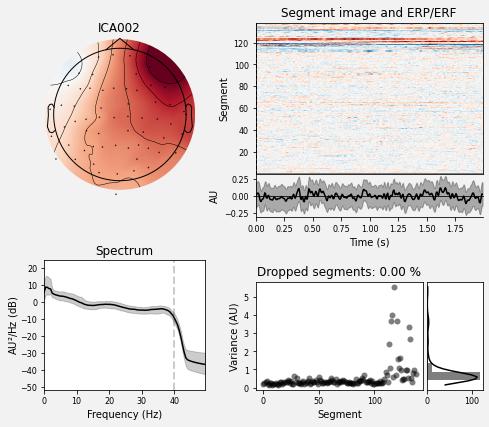

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [10]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [0, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude);

Fitting ICA to data using 59 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 1.4s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


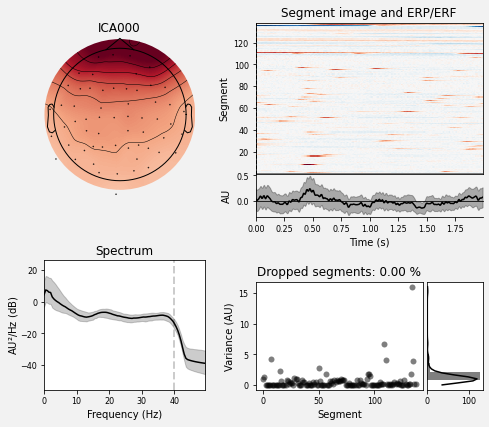

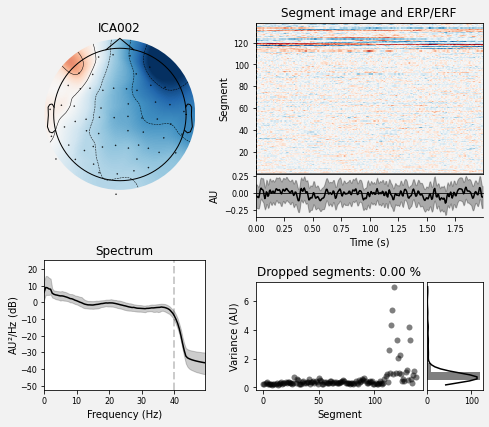

In [11]:
#filtered with high lowpass freq
ica_filtered = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica_filtered.fit(raw_filtered)
ica_filtered.exclude = [0, 2]  # details on how we picked these are omitted here
ica_filtered.plot_properties(raw_filtered, picks=ica_filtered.exclude);

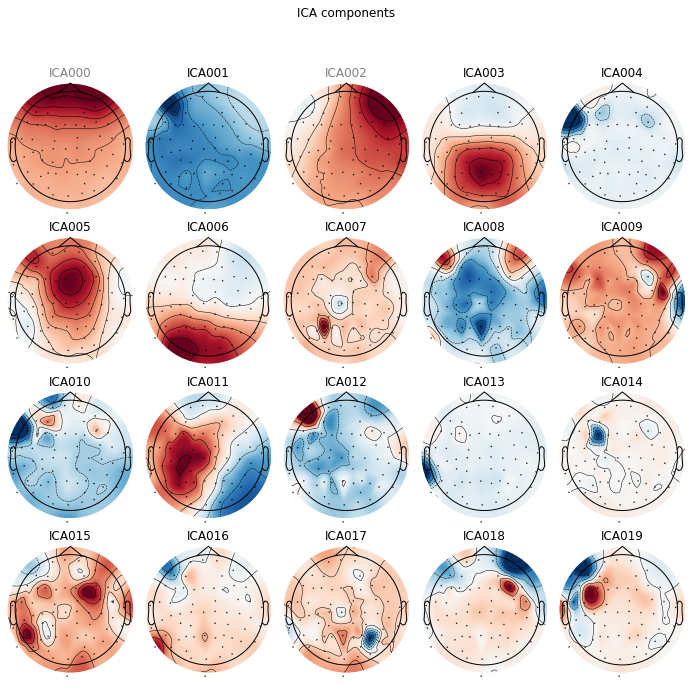

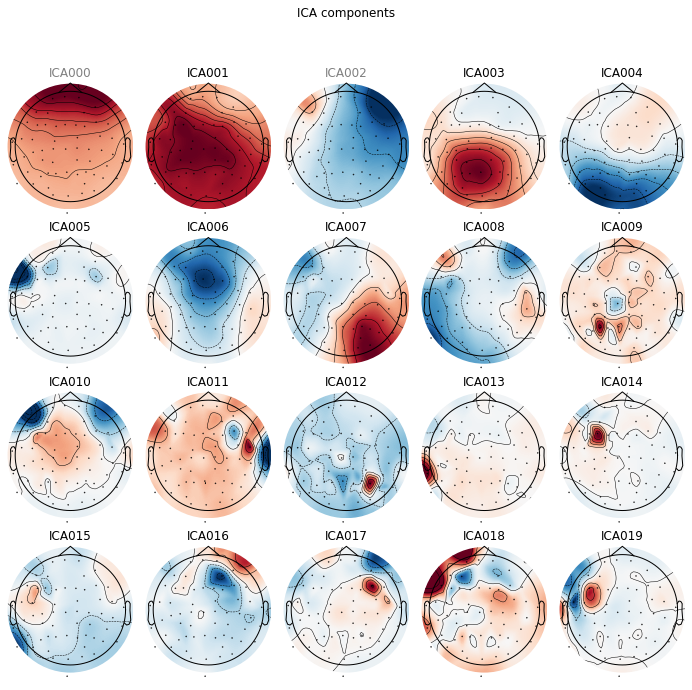

In [12]:
ica.plot_components();
ica_filtered.plot_components();

In [14]:
#not included the new filtering from here and down
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 59 PCA components


<Raw | sample_audvis_filt-0-40_raw.fif, 68 x 41700 (277.7 s), ~24.6 MB, data loaded>

In [16]:
# the stimulus channel on the Electra vector view is: STI 014
events = mne.find_events(raw, stim_channel='STI 014')

319 events found
Event IDs: [ 1  2  3  4  5 32]


In [17]:
event_dict = {'auditory/left': 1,
              'auditory/right': 2,
              'visual/left': 3,
              'visual/right': 4,
              }

In [18]:
reject_criteria = dict(eeg=150e-6)  # 150 µV


In [19]:
conds_we_care_about = ['auditory/left', 'auditory/right',
                       'visual/left', 'visual/right']

In [ ]:
#ALSO: you could do some evoked signal plots + all channels plot - any differences?